- 首先，我们导入了需要使用的库：numpy用于数值计算，pandas用于数据处理，matplotlib用于数据可视化，sklearn用于机器学习模型。

- 然后，我们从sklearn.datasets模块加载了波士顿房屋数据集。

- 接下来，我们提取了特征变量X和目标变量y。

- 我们使用PolynomialFeatures类将原始特征向量X转换为多项式特征向量X_poly。在这个案例中，我们选择了二次多项式特征。

- 使用LinearRegression类构建多项式回归模型并进行拟合。我们将多项式特征向量X_poly和目标变量y作为输入。

- 接下来，我们使用训练好的模型预测新的房屋价格。为了演示目的，我们选择了原始数据集中的第一个样本X_new作为新的房屋特征。

- 我们通过调用poly.transform()方法将新的特征向量X_new转换为多项式特征向量X_new_poly，然后将其输入到训练好的模型中预测房屋价格。

- 计算模型的性能指标，如均方误差（MSE）。我们使用模型对所有样本的预测值和真实值来计算MSE。

- 最后，我们使用matplotlib库绘制了原始数据散点图和模型的拟合曲线图。蓝色散点图表示实际房屋价格，红色散点图表示模型预测的新房屋价格，绿色曲线是模型的拟合曲线。

- 最后，我们打印出预测的新房屋价格和模型的均方误差。

In [6]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
# 加载波士顿房屋数据集
boston_df = pd.read_csv('./data/1_boston_housing.csv')

In [8]:
# 分离特征和目标变量 
X = boston_df.drop('TARGET', axis=1).values
y = boston_df['TARGET']

In [9]:
# 将特征向量转换为多项式特征
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 使用多项式回归模型进行拟合
model = LinearRegression()
model.fit(X_poly, y)

# 预测新的房屋价格
X_new = X[0].reshape(1, -1)
X_new_poly = poly.transform(X_new)
y_new = model.predict(X_new_poly)

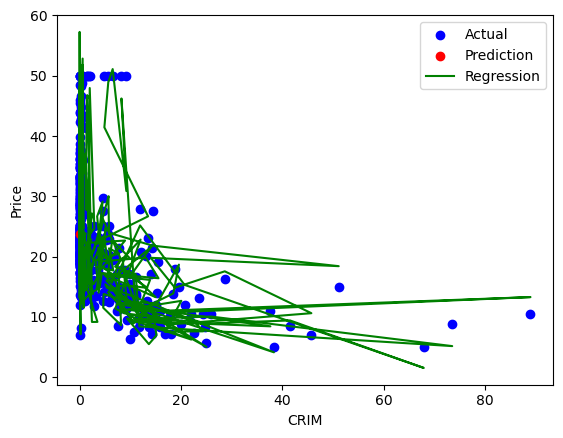

Predicted price for new house: [23.67423916]
Mean Squared Error: 7.470386341816937


In [11]:
from sklearn.metrics import mean_squared_error

# 计算模型的性能指标
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)

# 绘制原始数据散点图和拟合曲线图
plt.scatter(X[:, 0], y, color='blue', label='Actual')
plt.scatter(X_new[:, 0], y_new, color='red', label='Prediction')
plt.plot(X[:, 0], y_pred, color='green', label='Regression')
plt.xlabel('CRIM')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f"Predicted price for new house: {y_new}")
print(f"Mean Squared Error: {mse}")